# 2nd Period - Clustering


In [295]:
import pandas as pd

In [296]:
df = pd.read_csv("dataset/student_habits_performance.csv")

In [297]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [298]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [300]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


### Hipóteses sugeridas a partir dos dados
- Estudo e desempenho: Se a média de horas de estudo for alta entre alunos com melhor desempenho, pode-se supor que mais estudo leva a melhores resultados.
- Sono e desempenho: Se alunos com mais horas de sono apresentarem médias de desempenho superiores, pode-se sugerir que o sono influencia positivamente o rendimento.
- Atividades extracurriculares: Se a participação em atividades extracurriculares estiver associada a maiores médias de desempenho, pode-se levantar a hipótese de que essas atividades contribuem para o sucesso acadêmico.
- Uso de tecnologia: Se o tempo médio em dispositivos eletrônicos for maior entre alunos com menor desempenho pode-se supor que o uso excessivo de tecnologia impacta negativamente o rendimento.
- Alimentação: Se estudantes que relatam alimentação equilibrada apresentarem melhores notas, pode-se sugerir uma relação positiva entre alimentação e desempenho.

Essas hipóteses podem ser testadas posteriormente com análises estatísticas e técnicas de agrupamento.

## Análise Exploratória

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns

In [302]:
"""Vamos fazer mudanças no dataframe para trabalhar de forma melhor com os dados"""
df.set_index('student_id', inplace=True)

df['extracurricular_participation'] = df['extracurricular_participation'].map({'Yes': 1, 'No': 0})
df['part_time_job'] = df['part_time_job'].map({'Yes': 1, 'No': 0})
df['diet_quality'] = df['diet_quality'].map({'Poor': 0, 'Fair': 1, 'Good': 2})
df['internet_quality'] = df['internet_quality'].map({'Poor': 0, 'Average': 1, 'Good': 2})

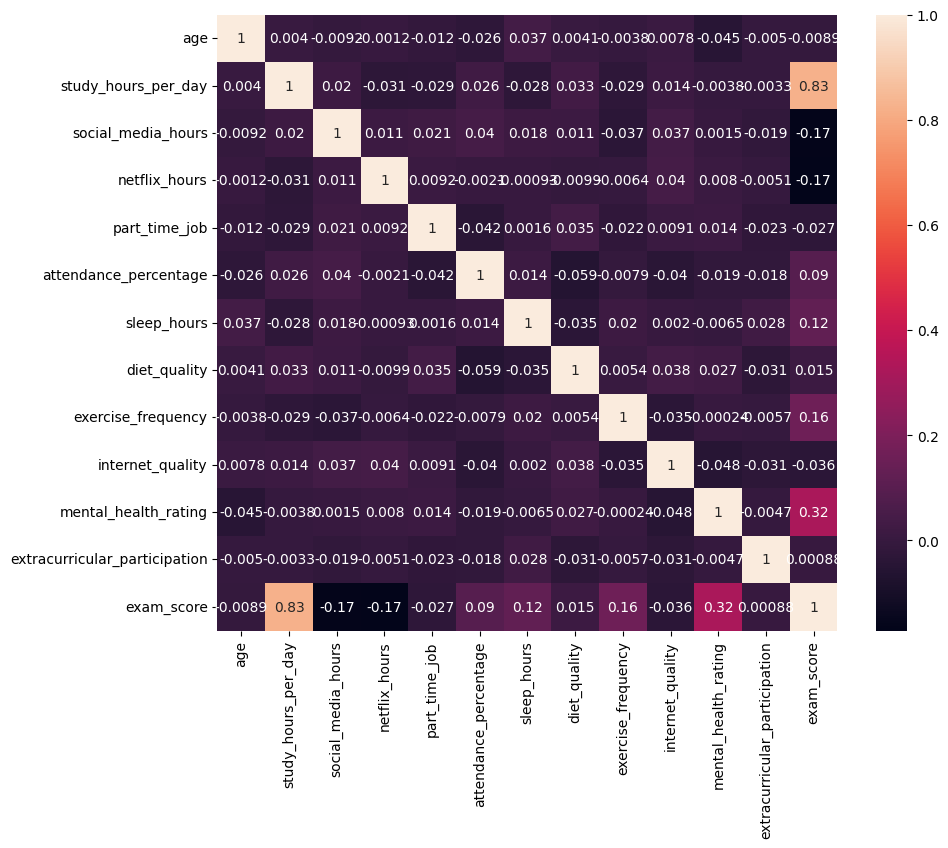

In [303]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True )
plt.show()

# Análise:
# - 'study_hours_per_day' e 'exam_score' apresentam correlação positiva, podendo indicar que mais horas de estudo tendem a resultar em melhores notas.
# - 'exercise_frequency' e 'mental_health_rating' também mostra correlação positiva com 'exam_score', maior inclusive que 'sleep_hours',
#   o que pode indicar  a importância dos cuidados com a saúde.
# - 'social_media_hours' e 'netflix_hours' tem correlação negativa com 'exam_score', o que pode indicar que quanto o tempo de tela pode afetar o desempenho. 
# - As demais variáveis numéricas apresentam correlações baixas entre si, indicando relativa independência.

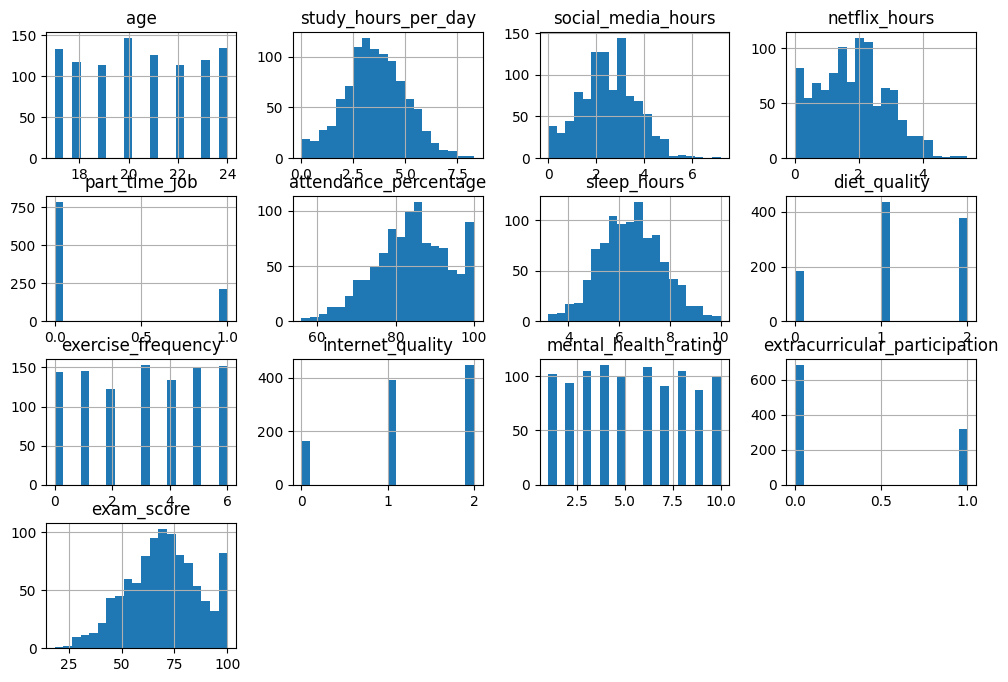

In [304]:
df.hist(bins=20, figsize=(12, 8))
plt.show()

'Horas de estudo aftam muito no desempenho, no entanto a participação em extracurriculares não parece estar muito ligado a essa melhora'

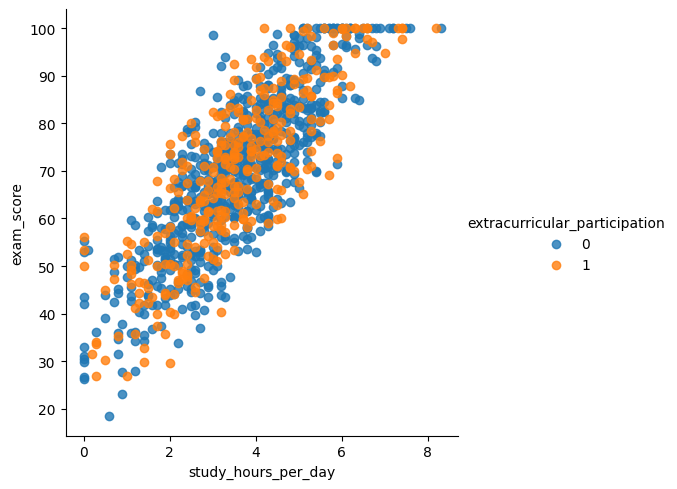

In [305]:
sns.lmplot(x= 'study_hours_per_day',y= 'exam_score', data=df, hue='extracurricular_participation', fit_reg=False)

"""Horas de estudo aftam muito no desempenho, no entanto a participação em extracurriculares não parece estar muito ligado a essa melhora"""

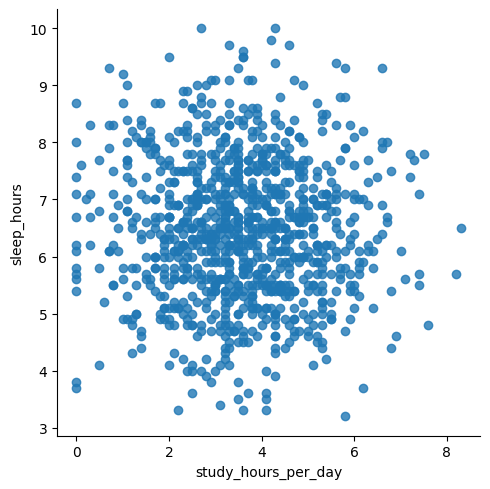

In [306]:
sns.lmplot(x= 'study_hours_per_day',y= 'sleep_hours', data=df, fit_reg=False)

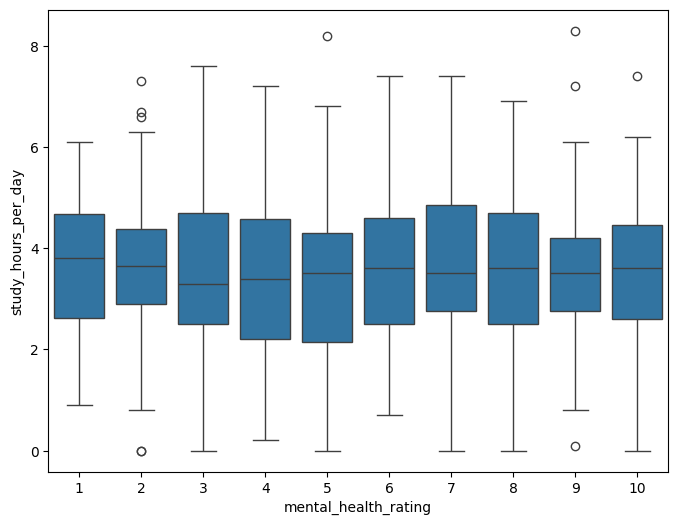

'A quantidade de horas estudadas por dia não parece interferir demasiadamente em mental_health_rating'

In [307]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="mental_health_rating", y="study_hours_per_day", data=df)
plt.show()

"A quantidade de horas estudadas por dia não parece interferir demasiadamente em mental_health_rating"

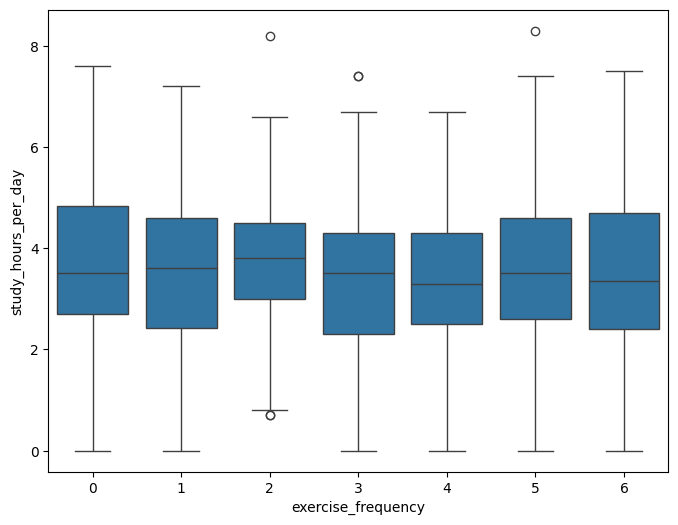

'A quantidade de horas estudadas também por dia não parece interferir demasiadamente em exercise_frequency'

In [308]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="exercise_frequency", y="study_hours_per_day", data=df)
plt.show()

"A quantidade de horas estudadas também por dia não parece interferir demasiadamente em exercise_frequency"

## Conclusão da Análise Exploratória


A análise exploratória dos dados de hábitos e desempenho dos estudantes revelou alguns padrões importantes:


- Existe uma correlação positiva entre as horas de estudo diárias e o desempenho em exames, sugerindo que estudantes que se dedicam mais aos estudos tendem a obter melhores notas.
- Fatores relacionados à saúde, como frequência de exercícios e avaliação de saúde mental, também apresentam relação positiva com o desempenho acadêmico, indicando a importância do bem-estar físico e mental.
- O tempo gasto em redes sociais e plataformas de streaming mostrou correlação negativa com o desempenho, sugerindo que o uso excessivo dessas mídias pode impactar negativamente os resultados escolares.
- Não foram observadas relações fortes entre as horas de estudo e variáveis como saúde mental ou frequência de exercícios, indicando que esses fatores podem atuar de forma independente sobre o desempenho.


Essas observações fornecem uma base sólida para a aplicação de técnicas de agrupamento (clustering), permitindo identificar perfis de estudantes com características e necessidades semelhantes, o que pode ser útil para intervenções educacionais e estratégias de apoio personalizadas.

## K-MEANS


In [309]:
import numpy as np

class K_Means:
    def __init__(self, n_clusters: int, iterations: int = 1000, tol: float = 1e-4):
        self.n_clusters = n_clusters
        self.iterations = iterations
        self.tol = tol
        self.centroids = None
        self.labels_ = None
        self.inertia_ = None

    def _init_centroids(self, x: np.ndarray) -> np.ndarray:
        n_samples, n_features = x.shape
        centroids = np.empty((self.n_clusters, n_features), dtype=x.dtype)
        idx = np.random.choice(n_samples)
        centroids[0] = x[idx]
        for i in range(1, self.n_clusters):
            dist = np.min(np.square(np.linalg.norm(x[:, np.newaxis] - centroids[:i], axis=2)), axis=1)
            probs = dist / dist.sum()
            next_idx = np.random.choice(n_samples, p=probs)
            centroids[i] = x[next_idx]
        return centroids

    def fit(self, x: np.ndarray) -> None:
        self.centroids = self._init_centroids(x)
        for _ in range(self.iterations):
            clusters_idxs = self.predict(x)
            new_centroids = np.array([x[clusters_idxs == c].mean(axis=0) if np.any(clusters_idxs == c)
                                      else self.centroids[c] for c in range(self.n_clusters)])
            shift = np.linalg.norm(self.centroids - new_centroids, axis=1).max()
            self.centroids = new_centroids
            if shift < self.tol:
                break
        self.labels_ = self.predict(x)
        self.inertia_ = np.sum((x - self.centroids[self.labels_]) ** 2)

    def predict(self, x: np.ndarray) -> np.ndarray:
        distances = np.linalg.norm(x[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)


### Escolha do número de clusters (K) para o K-Means

Para aplicar o K-Means de forma eficiente, é fundamental escolher um valor adequado para o número de clusters (K). Uma das abordagens mais utilizadas é o método do cotovelo (elbow method), que avalia a soma dos erros quadráticos dentro dos clusters (inertia) para diferentes valores de K. O ponto onde a redução da inércia começa a diminuir de forma menos acentuada indica o valor ideal de K.

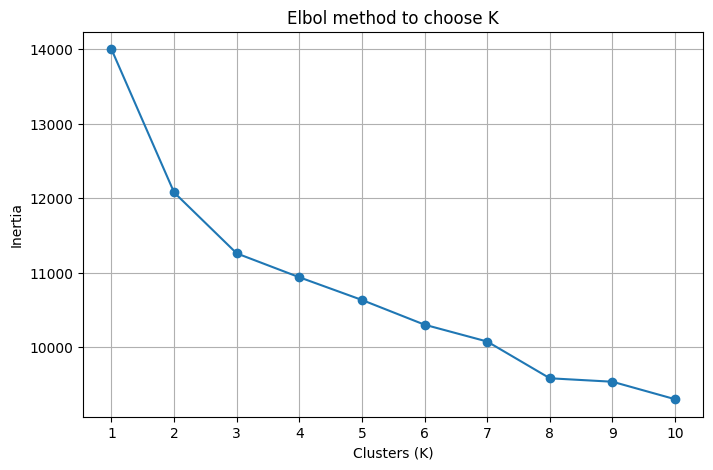

In [313]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df.select_dtypes(include=['number'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = K_Means(n_clusters=k)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbol method to choose K')
plt.xticks(k_range)
plt.grid(True)
plt.show()

### Justificativa do valor de K escolhido

Observando o gráfico do método do cotovelo acima, nota-se que a inércia diminui rapidamente até K=3 e, a partir desse ponto, a redução se torna menos significativa. Isso indica que três clusters são suficientes para capturar a maior parte da estrutura dos dados, evitando a criação de grupos artificiais ou pouco interpretáveis.

Portanto, **K=3** é o valor escolhido para o número de clusters, pois representa um equilíbrio entre simplicidade e capacidade de segmentação, além de ser coerente com a análise exploratória dos perfis de estudantes observados no dataset.

In [314]:
X_np = X_scaled  
kmeans = K_Means(n_clusters=3)
kmeans.fit(X_np)
df['cluster'] = kmeans.labels_
df['cluster'].value_counts().sort_index()

cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('cluster')))
df = df[cols]

In [315]:
df

,cluster,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,,
S1000,1,23,Female,0.0,1.2,1.1,0,85.0,8.0,1,6,Master,1,8,1,56.2
S1001,0,20,Female,6.9,2.8,2.3,0,97.3,4.6,2,6,High School,1,8,0,100.0
S1002,1,21,Male,1.4,3.1,1.3,0,94.8,8.0,0,1,High School,0,1,0,34.3
S1003,1,23,Female,1.0,3.9,1.0,0,71.0,9.2,0,4,Master,2,1,1,26.8
S1004,2,19,Female,5.0,4.4,0.5,0,90.9,4.9,1,3,Master,2,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,0,21,Female,2.6,0.5,1.6,0,77.0,7.5,1,2,High School,2,6,1,76.1
S1996,2,17,Female,2.9,1.0,2.4,1,86.0,6.8,0,1,High School,1,6,1,65.9
S1997,2,20,Male,3.0,2.6,1.3,0,61.9,6.5,2,5,Bachelor,2,9,1,64.4
